## Assignment Graph Visualization

Don Padmaperuma




The data used in this tutorial is a list of names and relationships among the earliest seventeenth-century Quakers. This dataset is derived from the Oxford Dictionary of National Biography and from the ongoing work of the Six Degrees of Francis Bacon project, which is reconstructing the social networks of early modern Britain (1500-1700).

I am using The file quakers_nodelist.csv which is a list of early modern Quakers (nodes) and the file quakers_edgelist.csv which is a list of relationships between those Quakers (edges). 

In [52]:
import csv
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data
Read the csv files and retrieve the data we need.

In [53]:
with open('quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [54]:
# number of nodes in the list
print(len(node_names))

119


In [55]:
# number of edges in the list
print(len(edges))

174


# Creating the Graph
Now we can put the two lists with nodes and edges together into a network graph to understand how nodes and edges are related.

In [56]:
G = nx.Graph()

In [57]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [58]:
# print the basic informaiton about our newly created graph
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


# Adding Attributes
Add some more information to nodes and edges through attributes. The list nodes contains all of the rows from quakers_nodelist.csv, including columns for name, historical significance, gender, birth year, death year, and SDFB ID (Six Degrees of Francis Bacon ID). 


In [59]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [60]:
for node in nodes: # Loop through the list.
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

The set_node_attributes function takes three variables: the Graph to which you’re adding the attribute, the dictionary of id-attribute pairs, and the name of the new attribute. 

In [61]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [62]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

# Network Metrics

Network density is simply the ratio of actual edges in the network to all possible edges in the network. 

In [63]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


 calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations.

In [64]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


A notes degree is the sum of its edges. Degree is the simplest and most common way of finding important nodes.

In [65]:
print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531'}


In [66]:
# finding the degree of William Penn, Quaker leader and founder of Pennsylvania
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [67]:
# Top 20 nodes by degree (Quarkers with most connections)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


# Graph Visualization

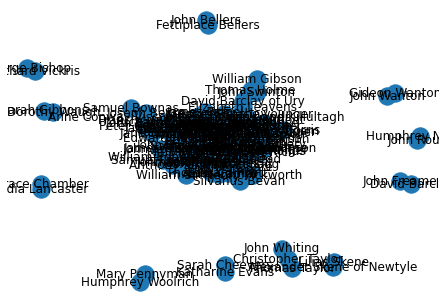

In [68]:
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))
plt.draw()

In [69]:
nx.write_gexf(G,"quakersgraph.gexf")

# Gephi Visualization

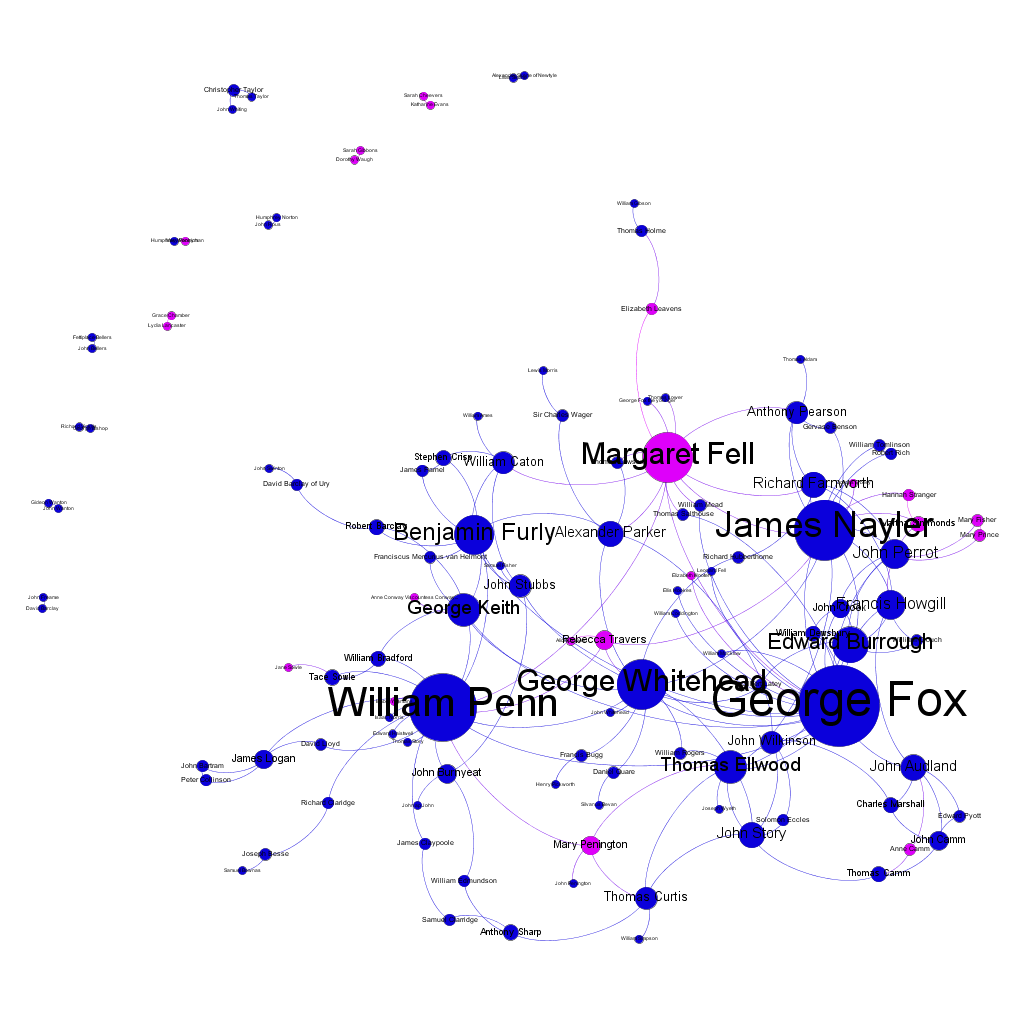

In [70]:
from IPython.display import Image
Image(filename='graph.png')

In [73]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=cdGc2Oi_l8I&feature=youtu.be')

**Reference**

Six Degrees of Francis Bacon(http://www.sixdegreesoffrancisbacon.com/?ids=10000473&min_confidence=60&type=network)


Saving a Networkx graph in GEXF format and visualize using Gephi(https://www.geeksforgeeks.org/saving-a-networkx-graph-in-gexf-format-and-visualize-using-gephi/)
